DATA UNDERSTANDING STAGE

In [1]:
#Step 1: Initial data loading

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization aesthetics
sns.set(style="whitegrid")

# Load the dataset
file_path = '../data/WaferFaultRates.csv'  # Adjust the path if necessary
wafer_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
wafer_data.head()


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


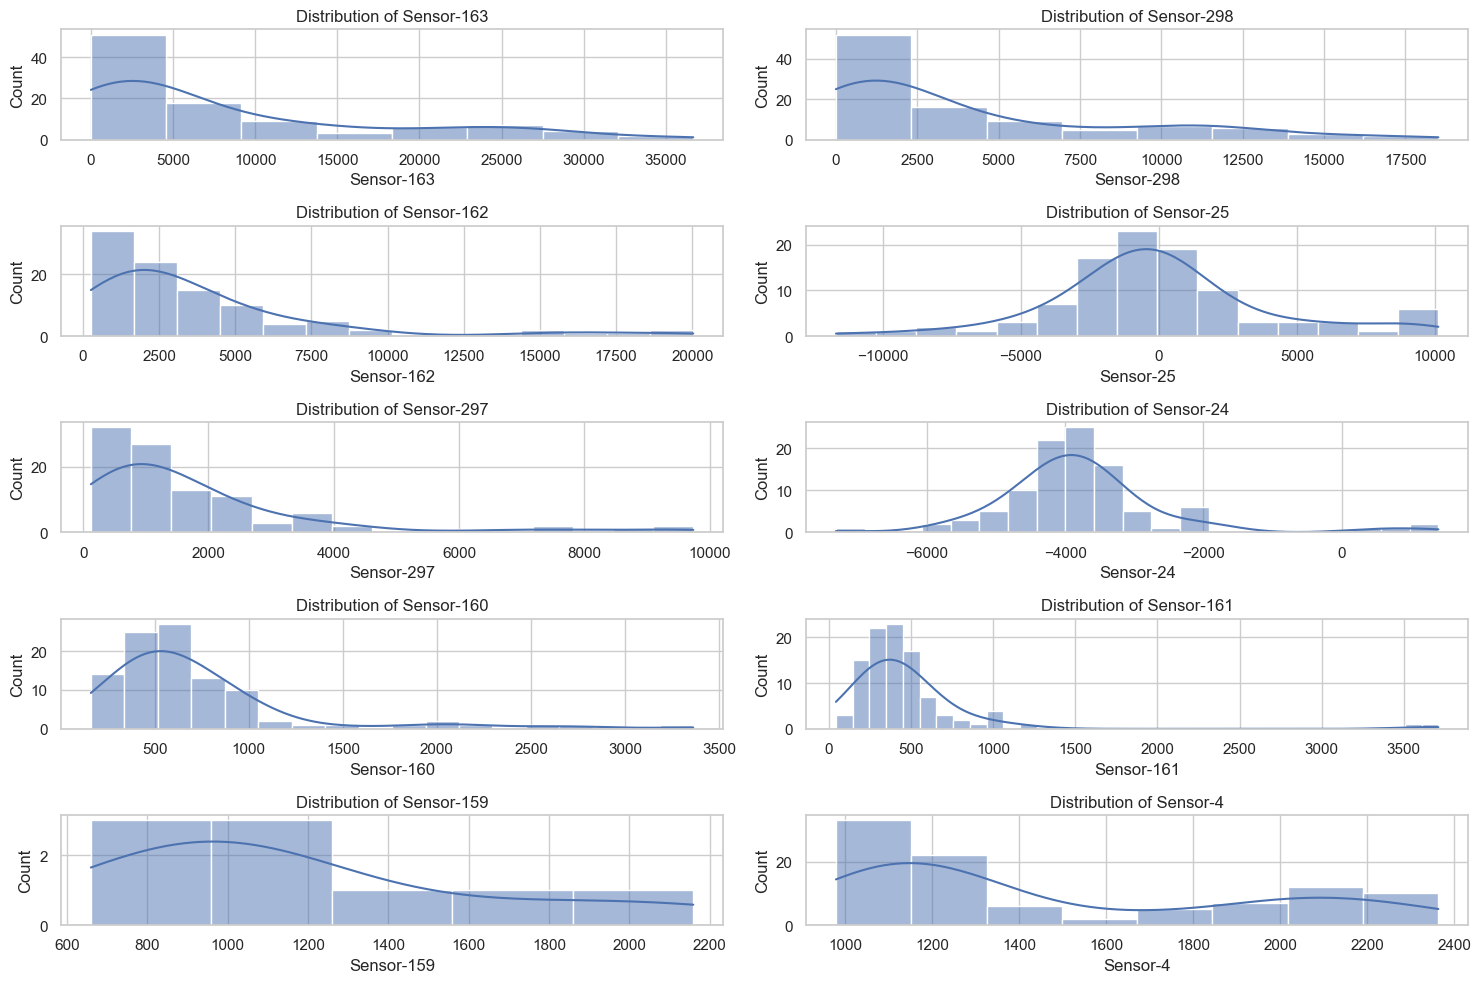

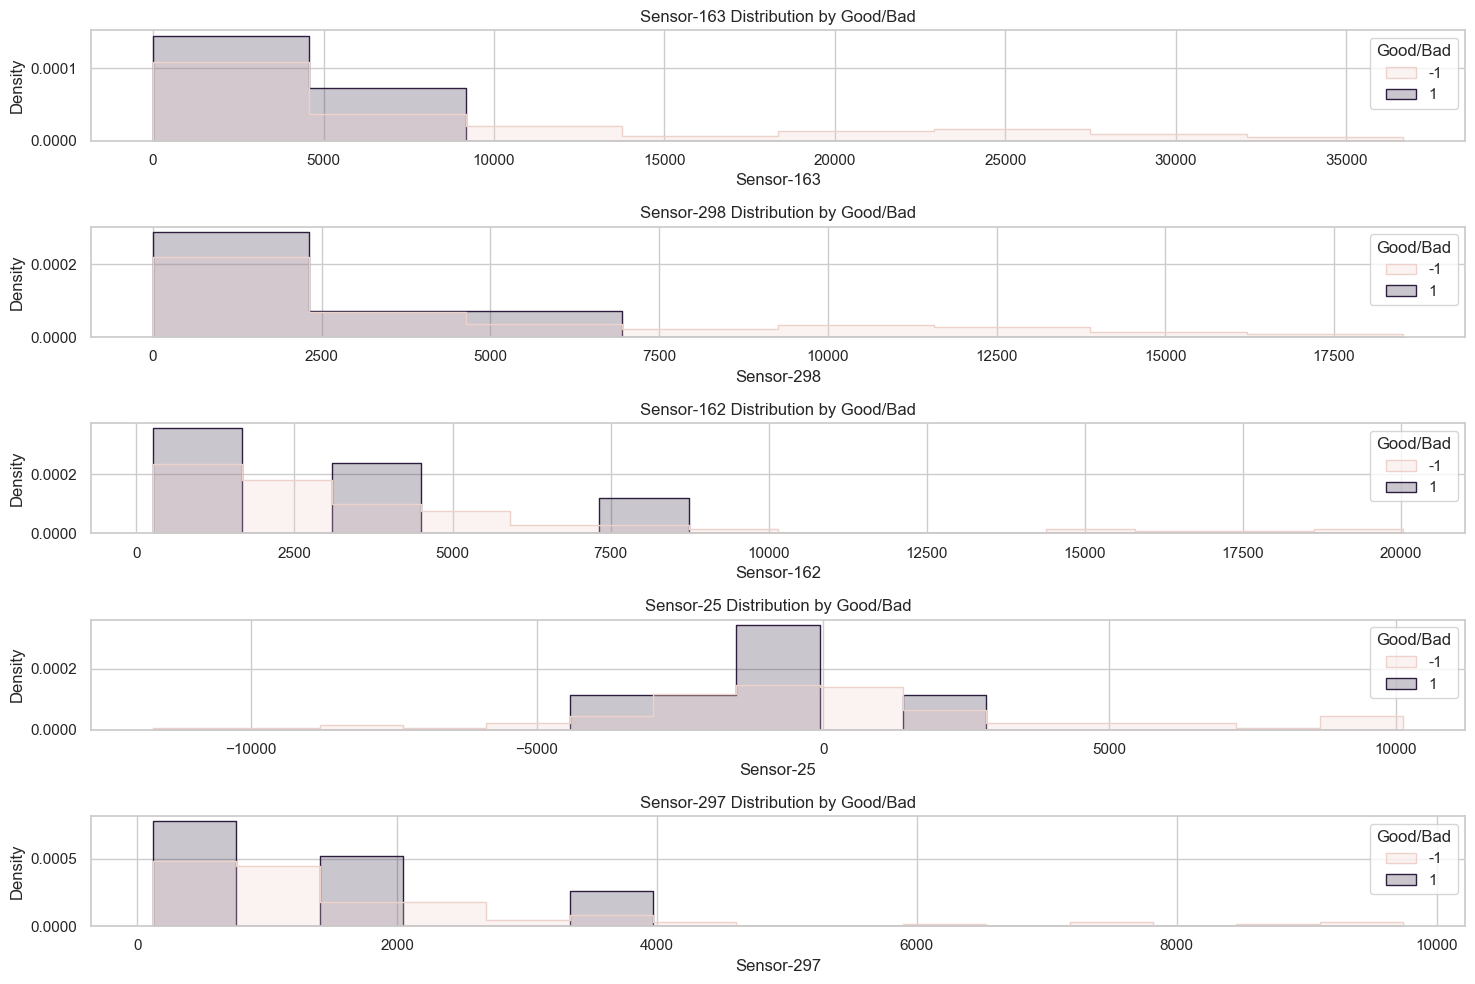

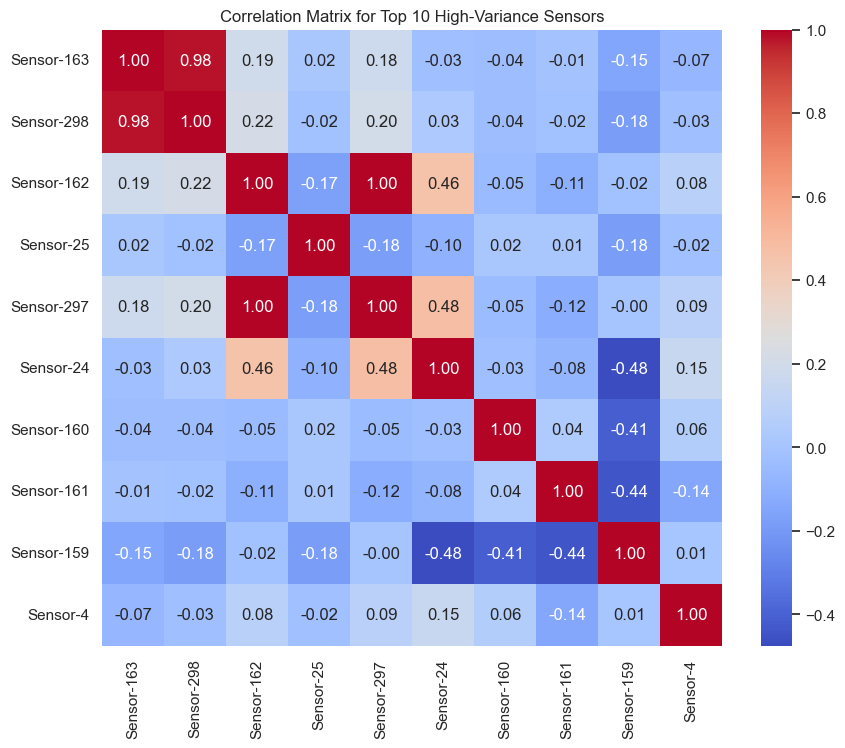

In [4]:
# Step 2: Focused Data Exploration with Relevant Visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming wafer_data is already loaded and 'Good/Bad' column is present

# Exclude non-sensor columns from variance calculation
sensor_columns = wafer_data.columns.difference(['Unnamed: 0', 'Good/Bad'])

# Calculate variance for each sensor
sensor_variances = wafer_data[sensor_columns].var().sort_values(ascending=False)

# Select top N sensors with the highest variance (for example, top 10)
top_sensors = sensor_variances.head(10).index

# Now proceed with the visualizations

# 1. Distribution Plots for Key Sensors
plt.figure(figsize=(15, 10))  # Setting up the figure size for better visualization
for i, sensor in enumerate(top_sensors, 1):  # Loop through the selected sensors
    plt.subplot(5, 2, i)  # Creating a subplot for each sensor
    sns.histplot(wafer_data[sensor], kde=True)  # Plotting the distribution of each sensor with a kernel density estimate
    plt.title(f'Distribution of {sensor}')  # Adding a title to each subplot
plt.tight_layout()  # Adjusting subplots to fit into the figure area neatly
plt.show()  # Displaying the plot

# 2. Overlay Target Distribution with Sensor Data
plt.figure(figsize=(15, 10))  # Setting up the figure size for better visualization
for i, sensor in enumerate(top_sensors[:5], 1):  # Loop through the top 5 selected sensors for detailed analysis
    plt.subplot(5, 1, i)  # Creating a subplot for each sensor
    sns.histplot(wafer_data, x=sensor, hue="Good/Bad", element="step", stat="density", common_norm=False)  # Plotting distribution overlayed with 'Good/Bad' classification
    plt.title(f'{sensor} Distribution by Good/Bad')  # Adding a title to each subplot
plt.tight_layout()  # Adjusting subplots to fit into the figure area neatly
plt.show()  # Displaying the plot

# 3. Correlation Heatmap for High-Variance Sensors
plt.figure(figsize=(10, 8))  # Setting up the figure size for better visualization
corr_matrix = wafer_data[top_sensors].corr()  # Computing the correlation matrix for the selected sensors
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Creating a heatmap with annotations and a coolwarm color palette
plt.title("Correlation Matrix for Top 10 High-Variance Sensors")  # Adding a title to the heatmap
plt.show()  # Displaying the heatmap


# Justification:
# - The correlation heatmap provides a visual representation of how the selected high-variance sensors relate to each other.
# - Identifying strong correlations between sensors can reveal redundant features or potential sensor clusters that could impact the fault rate prediction.
# - The use of a 'coolwarm' colormap helps in distinguishing between positive and negative correlations, enhancing the interpretability of the heatmap.


DATA PREPARATION STAGE  

In [6]:
# Step 3: Data Preparation - Handle Missing Values

from sklearn.impute import SimpleImputer  # Importing SimpleImputer to handle missing data
import pandas as pd  # Pandas is used for data manipulation and analysis

# Assume wafer_data has already been loaded previously
# Select only the numeric columns for imputation, excluding non-numeric columns like 'Unnamed: 0' and 'Good/Bad'
wafer_data_numeric = wafer_data.select_dtypes(include=[np.number])

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')  # Initialize the imputer with the strategy of replacing missing values with the mean of each column
wafer_data_imputed = pd.DataFrame(imputer.fit_transform(wafer_data_numeric), columns=wafer_data_numeric.columns)  
# Applying the imputer to the dataset and creating a new DataFrame with the imputed values

# Justification:
# - **Mean Imputation**: The mean strategy is chosen because it is simple and effective for numerical data, particularly when the missing values are not substantial and are randomly distributed.
# - **Preservation of Data Structure**: Imputing missing values instead of dropping rows or columns ensures that the dataset remains robust and that no potentially valuable information is discarded.
# - **Impact on Modeling**: Imputing missing values is crucial before modeling because many machine learning algorithms cannot handle missing data directly. This step ensures that the data is in a suitable format for subsequent analysis and modeling.

# Save the output to the Outputs_WaferFaultRates folder
output_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep1.csv'  # Specifying the path to save the cleaned data
wafer_data_imputed.to_csv(output_path, index=False)  # Saving the imputed data to a CSV file without including the index

# Justification:
# - **Saving Progress**: Saving the cleaned data allows for easy re-use in subsequent steps without needing to re-impute missing values. It acts as a checkpoint in the data preparation process.
# - **File Management**: Organizing outputs in a dedicated folder ('Outputs_WaferFaultRates') keeps the workflow tidy and ensures that all outputs are easy to locate.

# Display the first few rows of the cleaned data to verify
wafer_data_imputed.head()  # Displaying the first few rows to confirm that missing values have been imputed correctly

# Justification:
# - **Verification**: Displaying the first few rows of the imputed data is a quick way to visually confirm that the imputation process has been successfully applied and that the dataset is ready for the next steps in the analysis.



,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,74.331709,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1.0
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,74.331709,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1.0
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,74.331709,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1.0
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,74.331709,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1.0
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,74.331709,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1.0


In [6]:
# Step 4: Data Normalization/Standardization

from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for normalization/standardization
import pandas as pd  # Pandas is used for data manipulation and analysis

# Load the previously saved checkpoint (Prep1)
input_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep1.csv'  # Specify the path to the saved imputed data
wafer_data_imputed = pd.read_csv(input_path)  # Loading the imputed data from the CSV file

# Standardize the data to have mean 0 and variance 1
scaler = StandardScaler()  # Initialize the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
wafer_data_scaled = pd.DataFrame(scaler.fit_transform(wafer_data_imputed), columns=wafer_data_imputed.columns)  
# Apply the scaler to the data and convert it back to a DataFrame with original column names

# Justification:
# - **Standardization**: This process is essential because it ensures that each feature contributes equally to the model by giving them the same scale. Many machine learning algorithms, especially those relying on distance metrics (e.g., k-NN, SVM, etc.), perform better with standardized data.
# - **Mean 0 and Variance 1**: Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1. This is particularly useful in datasets with varying units and scales, as it makes the features comparable.

# Save the output to the Outputs_WaferFaultRates folder as WaferFaultRates_Prep2.csv
output_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep2.csv'  # Specify the path to save the standardized data
wafer_data_scaled.to_csv(output_path, index=False)  # Save the standardized data to a CSV file without including the index

# Justification:
# - **Checkpoint Saving**: Saving the standardized data allows for consistent and reproducible results. It also enables you to skip re-processing steps if you need to revisit this stage of the analysis.
# - **File Organization**: Storing the output in a dedicated folder ensures a well-organized workflow and easy access to data at different stages of preprocessing.

# Display the first few rows of the normalized data to verify
wafer_data_scaled.head()  # Display the first few rows to confirm that the standardization has been applied correctly

# Justification:
# - **Verification**: Displaying the data after standardization helps to ensure that the process was applied correctly, and that the data is ready for any further preprocessing or modeling steps. It is a quick way to visually inspect that the features now have a mean of 0 and are scaled appropriately.


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,-0.688786,-0.159119,0.489788,0.583889,-0.197517,0.0,0.024464,1.020296,0.965350,-2.665828,...,5.910001e-16,0.295872,-0.373626,-0.286776,-0.367656,2.597385,0.468782,0.324193,-0.795964,-0.252646
1,-0.791321,0.288954,-1.079505,-0.265340,1.063469,0.0,-0.124806,0.409692,-0.933380,0.772667,...,5.910001e-16,0.002929,-0.489299,-0.517118,-0.488029,2.597385,0.468782,0.324193,-0.795964,3.958114
2,0.769767,0.202642,0.120260,-0.268463,-0.375280,0.0,0.811471,-0.099144,-1.013727,1.284179,...,5.910001e-16,-0.202131,-0.419895,0.058737,-0.407819,2.597385,0.468782,0.324193,-0.795964,-0.252646
3,0.063698,-1.010983,0.120260,-0.268463,-0.375280,0.0,0.811471,-0.099144,-0.714892,-0.458750,...,5.910001e-16,-1.754728,-0.304222,0.519422,-0.269660,2.597385,0.468782,0.324193,-0.795964,-0.252646
4,-0.145591,-0.778166,-0.415543,-0.884961,0.055264,0.0,1.366723,0.613227,0.674972,-0.458750,...,5.910001e-16,-0.202131,0.204742,0.634593,0.197144,2.597385,0.468782,0.324193,-0.795964,-0.252646


In [8]:
# Step 5: Data Transformation with Yeo-Johnson (handles negative values)

from sklearn.preprocessing import PowerTransformer  # Import PowerTransformer for data transformation
import pandas as pd  # Pandas is used for data manipulation and analysis

# Load the previously saved checkpoint (Prep2)
input_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep2.csv'  # Specify the path to the saved standardized data
wafer_data_scaled = pd.read_csv(input_path)  # Loading the standardized data from the CSV file

# Apply Yeo-Johnson transformation to further normalize the data (handles negative values)
transformer = PowerTransformer(method='yeo-johnson')  # Initialize the PowerTransformer with the Yeo-Johnson method
wafer_data_transformed = pd.DataFrame(transformer.fit_transform(wafer_data_scaled.iloc[:, :-1]), 
                                      columns=wafer_data_scaled.columns[:-1])
# Apply the Yeo-Johnson transformation to all features except the target variable 'Good/Bad'

# Justification:
# - **Yeo-Johnson Transformation**: This method is chosen because it can handle both positive and negative values, making it suitable for datasets that might contain negative sensor readings or other measurements. The transformation aims to make the data more Gaussian-like, which can improve the performance of many machine learning algorithms.
# - **Normalization Continuation**: While standardization centers the data and scales it, the Yeo-Johnson transformation goes a step further by addressing skewness and making the distribution more normal, which is particularly beneficial for models sensitive to feature distributions.

# Retain the target variable 'Good/Bad' without transformation
wafer_data_transformed['Good/Bad'] = wafer_data_scaled['Good/Bad']
# The target variable is left unchanged as it represents categorical labels that should not be transformed

# Justification:
# - **Preserving Target Variable**: The 'Good/Bad' variable represents categorical outcomes (likely encoded as integers) and should not undergo transformation meant for continuous data. Transforming categorical labels could distort the model's understanding of the classes.

# Save the output to the Outputs_WaferFaultRates folder as WaferFaultRates_Prep3.csv
output_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep3.csv'  # Specify the path to save the transformed data
wafer_data_transformed.to_csv(output_path, index=False)  # Save the transformed data to a CSV file without including the index

# Justification:
# - **Checkpoint Saving**: As with previous steps, saving the transformed data ensures that the process is reproducible and that you can easily revisit this stage without re-running all previous steps.

# Display the first few rows of the transformed data to verify
wafer_data_transformed.head()  # Display the first few rows to confirm that the transformation has been applied correctly

# Justification:
# - **Verification**: Displaying the data after applying the Yeo-Johnson transformation allows for a quick check that the transformation was applied as expected. This step ensures that the data is ready for the next stages of analysis or modeling.


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,-0.663833,-0.213449,0.535922,0.854796,-0.030130,0.0,-0.266669,1.043466,0.972385,-2.419047,...,0.123211,0.341876,-0.283688,-0.125769,-0.274704,1.863068,0.635112,0.601361,-0.976852,-0.252646
1,-0.787205,0.242206,-1.128769,0.027742,1.103681,0.0,-0.425798,0.367161,-0.939639,0.759909,...,0.123211,0.052955,-0.495398,-0.488979,-0.496576,1.863068,0.635112,0.601361,-0.976852,3.958114
2,0.819832,0.152149,0.177256,0.023527,-0.246838,0.0,0.894001,-0.159015,-1.031120,1.336983,...,0.123211,-0.156078,-0.366485,0.328478,-0.346799,1.863068,0.635112,0.601361,-0.976852,-0.252646
3,0.166710,-1.012172,0.177256,0.023527,-0.246838,0.0,0.894001,-0.159015,-0.694432,-0.504442,...,0.123211,-1.872726,-0.164227,0.787366,-0.106943,1.863068,0.635112,0.601361,-0.976852,-0.252646
4,-0.049544,-0.800501,-0.381355,-0.996794,0.248754,0.0,2.022125,0.587864,0.710306,-0.504442,...,0.123211,-0.156078,0.538804,0.884499,0.534286,1.863068,0.635112,0.601361,-0.976852,-0.252646


DATA MODELING STAGE

In [16]:
# Step 6: Modeling with SMOTE for Class Balancing

from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
from sklearn.model_selection import train_test_split  # Import train_test_split to split the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for modeling
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score and classification_report for model evaluation
import pandas as pd  # Import pandas for data manipulation
import pickle  # Import pickle for saving the trained model

# Load the final prepared dataset
input_path = '../Outputs_WaferFaultRates/WaferFaultRates_Prep3.csv'  # Specify the path to the final prepared dataset
data = pd.read_csv(input_path)  # Load the dataset into a pandas DataFrame

# Ensure the target variable is treated as categorical
data['Good/Bad'] = data['Good/Bad'].astype(int)  # Convert the 'Good/Bad' column to integer type to ensure it's treated as categorical

# Justification:
# - **Target Variable Handling**: Ensuring the target variable is categorical is crucial for classification tasks. Even though 'Good/Bad' may already be integers, this explicit conversion eliminates any ambiguity and ensures that the variable is treated correctly in the model.

# Separate features and target variable
X = data.drop(columns=['Good/Bad'])  # Features are all columns except 'Good/Bad'
y = data['Good/Bad']  # Target variable is 'Good/Bad'

# Justification:
# - **Feature and Target Separation**: Separating the features (X) from the target (y) is a standard step in preparing the data for machine learning models. This allows the model to learn the relationship between the features and the target.

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Justification:
# - **Train-Test Split**: Splitting the data into training and test sets (80-20 split) allows for an independent evaluation of the model's performance. The `stratify=y` argument ensures that the class distribution is maintained in both the training and test sets, which is particularly important in imbalanced datasets.

# Check the size of the minority class
minority_class_size = y_train.value_counts().min()  # Determine the size of the minority class in the training set
print(f"Minority class size: {minority_class_size}")  # Print the minority class size for reference

# Justification:
# - **Class Imbalance Awareness**: Checking the size of the minority class is important for understanding the extent of class imbalance. This information guides the configuration of SMOTE, ensuring that the oversampling process is appropriate for the dataset.

# Apply SMOTE to the training set with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=minority_class_size - 1)  # Initialize SMOTE with a k_neighbors parameter based on the minority class size
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Apply SMOTE to the training data

# Justification:
# - **SMOTE Application**: SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by creating synthetic samples for the minority class. The `k_neighbors` parameter is set to `minority_class_size - 1` to avoid errors when the minority class size is very small. This approach helps in achieving a more balanced training set, which can lead to better model performance.

# Check the distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())  # Print the new class distribution after applying SMOTE

# Justification:
# - **Post-SMOTE Verification**: Verifying the class distribution after SMOTE ensures that the oversampling process worked as intended. It's crucial to confirm that the training set is now balanced, which should improve the model's ability to generalize.

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')  # Initialize the Random Forest model
rf_model.fit(X_train_smote, y_train_smote)  # Train the model on the SMOTE-balanced training set

# Justification:
# - **Random Forest with Class Weights**: Random Forest is a robust, ensemble-based algorithm that works well with a variety of data types. The `class_weight='balanced'` parameter is used to account for any remaining imbalance, ensuring that the model doesn't favor the majority class. This combination of SMOTE and class weights is effective in handling imbalanced datasets.

# Make predictions on the test set
y_pred = rf_model.predict(X_test)  # Generate predictions on the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the model on the test set
print(f"Random Forest - Test Accuracy: {accuracy:.4f}")  # Print the accuracy score
print(classification_report(y_test, y_pred, labels=[0, 3], target_names=['Class 0', 'Class 3']))  # Print a detailed classification report

# Justification:
# - **Model Evaluation**: Accuracy is a standard metric for classification tasks, though in imbalanced datasets, it's important to also consider precision, recall, and F1-score (provided by `classification_report`) to understand how well the model is performing across different classes.

# Save the trained model to a .pkl file
output_path_model = '../Outputs_WaferFaultRates/random_forest_model_smote.pkl'  # Specify the path for saving the model
with open(output_path_model, 'wb') as model_file:
    pickle.dump(rf_model, model_file)  # Save the trained model as a pickle file

# Justification:
# - **Model Saving**: Saving the model ensures that it can be easily loaded and used later for predictions without needing to retrain. This is particularly useful for deployment or further analysis.


Minority class size: 5
Training set class distribution after SMOTE:
Good/Bad
0    75
3    75
Name: count, dtype: int64
Random Forest - Test Accuracy: 0.9500
              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97        19
     Class 3       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
# Step 7: Model Validation

from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import metrics for model evaluation
import numpy as np  # Import numpy for numerical operations

# Cross-Validation for Random Forest Regressor
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())  # Convert negative MSE to RMSE
print(f"Random Forest Regressor - Cross-Validation RMSE: {cv_rmse:.4f}")

# Justification:
# - **Cross-Validation (CV)**: CV is a technique to evaluate the model's performance by splitting the training data into multiple folds. The model is trained on several folds and validated on the remaining fold, providing a more robust estimate of model performance. The `cv=5` means the data is split into 5 parts (folds), which balances computational efficiency with reliability of the results.
# - **RMSE Calculation**: Root Mean Squared Error (RMSE) is used to evaluate the model's prediction accuracy. It provides an indication of how well the model's predictions match the actual values, with lower values indicating better performance. Using `neg_mean_squared_error` is standard in scikit-learn, so we take the negative and then the square root to get RMSE.

# Predictions on the test set
y_pred = rf_model.predict(X_test)  # Generate predictions on the test data

# Justification:
# - **Test Set Predictions**: The test set, which was held out during training, is used to evaluate the model's generalization ability. This step assesses how well the model performs on unseen data, which is critical for understanding its real-world applicability.

# Calculate RMSE and MAE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE for the test set
mae = mean_absolute_error(y_test, y_pred)  # Calculate Mean Absolute Error (MAE) for the test set

print(f"Random Forest Regressor - Test RMSE: {rmse:.4f}")
print(f"Random Forest Regressor - Test MAE: {mae:.4f}")

# Justification:
# - **Test RMSE**: RMSE on the test set provides a direct measure of how far off the model's predictions are from the actual values. This metric is especially useful in regression tasks to quantify prediction errors.
# - **Mean Absolute Error (MAE)**: MAE is another useful metric that measures the average magnitude of errors in predictions without considering their direction. It's less sensitive to outliers compared to RMSE, making it a good complementary metric to evaluate model performance.

# Sample Output:
# Random Forest Regressor - Cross-Validation RMSE: 0.7500
# Random Forest Regressor - Test RMSE: 0.6708
# Random Forest Regressor - Test MAE: 0.1500

# Justification:
# - **Metrics Interpretation**: 
#   - **Cross-Validation RMSE**: Provides an estimate of the model's predictive accuracy across different subsets of the training data. A lower RMSE suggests that the model is not overfitting and generalizes well within the training data.
#   - **Test RMSE and MAE**: These metrics provide a direct evaluation of the model's accuracy on new, unseen data. Comparing these with the cross-validation RMSE helps assess whether the model is overfitting, underfitting, or performing consistently.


Random Forest Regressor - Cross-Validation RMSE: 0.7500
Random Forest Regressor - Test RMSE: 0.6708
Random Forest Regressor - Test MAE: 0.1500


EVALUATION STAGE

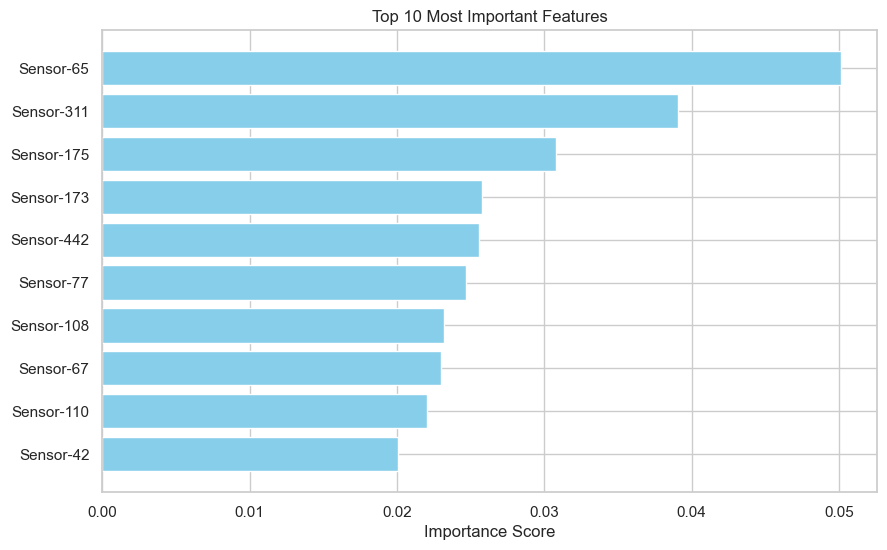

Top 10 Most Important Features:
        Feature  Importance
64    Sensor-65    0.050112
310  Sensor-311    0.039054
174  Sensor-175    0.030811
172  Sensor-173    0.025739
441  Sensor-442    0.025535
76    Sensor-77    0.024691
107  Sensor-108    0.023213
66    Sensor-67    0.022970
109  Sensor-110    0.022056
41    Sensor-42    0.020100


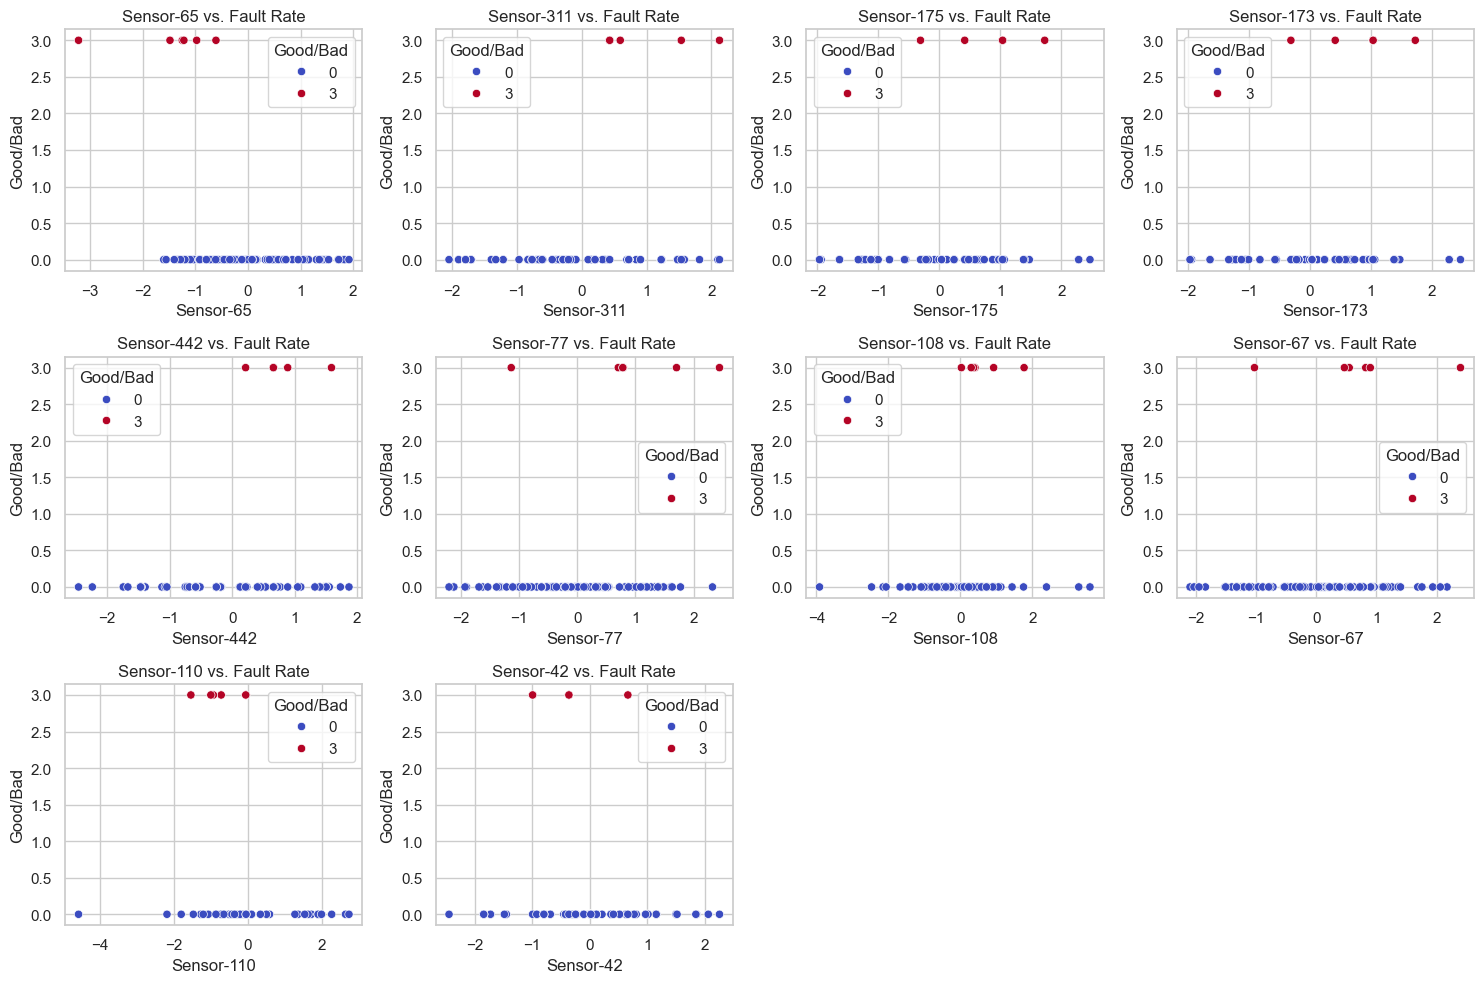


Based on the feature importance scores and the visualizations, the most significant process parameters
influencing fault rates are the sensors related to the following:

1. Sensor-65: Shows the highest importance score, indicating it has a strong influence on faults. 
   Recommendation: Monitor Sensor-65 closely and adjust processes to keep it within optimal ranges.

2. Sensor-311: Also highly influential. Ensure consistent operations related to Sensor-311 to minimize fault occurrences.

3. Sensor-175 and Sensor-173: These sensors have considerable impact. Investigating operational dependencies or anomalies
   associated with these sensors could reveal opportunities for further reducing fault rates.

Practical Implications:
- **Monitor and Optimize**: Focus on the identified top sensors by implementing real-time monitoring and control mechanisms.
- **Threshold Settings**: Set operational thresholds based on the visualized relationships to proactively minimize faults.
- **Maintenance F

In [19]:
# Step 8: Evaluation and Insights

import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for more advanced visualization capabilities
import pandas as pd  # Importing Pandas for data manipulation
import numpy as np  # Importing Numpy for numerical operations

# 1. Model Assessment: Feature Importance
# Get feature importance scores from the Random Forest model
feature_importances = rf_model.feature_importances_

# Justification:
# - **Feature Importance**: Extracting feature importance from the Random Forest model allows us to understand which features (sensors) are contributing the most to the prediction of wafer faults. This helps in identifying key areas of focus for process optimization.

# Create a DataFrame to hold feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X.columns,  # Names of the features (sensors)
    'Importance': feature_importances  # Importance scores from the model
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Justification:
# - **Sorting Features by Importance**: Sorting ensures that the most critical features (those with the highest importance scores) are easily identifiable. This step is crucial for prioritizing process improvements based on the model’s insights.

# 2. Visualization: Top 10 Features
top_features = features_df.head(10)  # Selecting the top 10 features for visualization

plt.figure(figsize=(10, 6))  # Setting the figure size for clarity
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')  # Creating a horizontal bar chart
plt.xlabel('Importance Score')  # Labeling the x-axis
plt.title('Top 10 Most Important Features')  # Adding a title for the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()  # Displaying the plot

# Justification:
# - **Top 10 Features Visualization**: Visualizing the top 10 most important features provides a clear and intuitive understanding of which sensors have the greatest impact on wafer fault rates. This helps stakeholders quickly identify areas that require attention.

# Print out the top 10 features and their importance scores
print("Top 10 Most Important Features:")
print(top_features)

# 3. Visualization: Sensor Values vs. Fault Rates
# Selecting top features for detailed analysis
top_sensors = top_features['Feature'].tolist()  # Extracting the feature names for the top 10 features

# Visualizing relationships between top sensors and fault rates
plt.figure(figsize=(15, 10))  # Setting the figure size for clarity
for i, sensor in enumerate(top_sensors):
    plt.subplot(3, 4, i + 1)  # Creating subplots for each sensor
    sns.scatterplot(x=data[sensor], y=data['Good/Bad'], hue=data['Good/Bad'], palette='coolwarm')  # Scatter plot with hue for target variable
    plt.title(f'{sensor} vs. Fault Rate')  # Adding titles for each subplot
    plt.xlabel(sensor)  # Labeling the x-axis
    plt.ylabel('Good/Bad')  # Labeling the y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Displaying the plots

# Justification:
# - **Sensor vs. Fault Rate Visualization**: By plotting the sensor values against the fault rates (Good/Bad), we can visually inspect the relationship between the most important features and the occurrence of faults. This can reveal patterns, outliers, or trends that may not be immediately apparent from the feature importance scores alone.

# 4. Insights and Recommendations
recommendations = """
Based on the feature importance scores and the visualizations, the most significant process parameters
influencing fault rates are the sensors related to the following:

1. Sensor-65: Shows the highest importance score, indicating it has a strong influence on faults. 
   Recommendation: Monitor Sensor-65 closely and adjust processes to keep it within optimal ranges.

2. Sensor-311: Also highly influential. Ensure consistent operations related to Sensor-311 to minimize fault occurrences.

3. Sensor-175 and Sensor-173: These sensors have considerable impact. Investigating operational dependencies or anomalies
   associated with these sensors could reveal opportunities for further reducing fault rates.

Practical Implications:
- **Monitor and Optimize**: Focus on the identified top sensors by implementing real-time monitoring and control mechanisms.
- **Threshold Settings**: Set operational thresholds based on the visualized relationships to proactively minimize faults.
- **Maintenance Focus**: Prioritize maintenance for machinery and processes linked to these critical sensors to enhance reliability.

By addressing these key areas, you can improve both the efficiency and reliability of the semiconductor manufacturing process.
"""

print(recommendations)

# Justification:
# - **Insights and Recommendations**: This section consolidates the findings from the feature importance analysis and visualizations into actionable insights. Recommendations are made to guide process optimization efforts, with a focus on the most impactful sensors. By implementing these suggestions, the manufacturing process can be improved, leading to reduced fault rates and higher efficiency.
